In [9]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import datasets as K_datasets
from tensorflow.keras import models as K_models
from tensorflow.keras import layers as K_layers
from tensorflow.keras import utils as K_utils
from tensorflow.keras import optimizers as K_optimizers

In [2]:
(X_train, y_train), (X_test, y_test) = K_datasets.cifar10.load_data()
num_classes = len(np.unique(np.concatenate([y_train, y_test])))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, num_classes)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1) 10


In [4]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

y_train = K_utils.to_categorical(y_train, num_classes)
y_test = K_utils.to_categorical(y_test, num_classes)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [7]:
# two methods to build a model

model = K_models.Sequential([
    K_layers.Flatten(input_shape=(32, 32, 3)), 
    K_layers.Dense(200, activation='relu'),
    K_layers.Dense(150, activation='relu'), 
    K_layers.Dense(10, activation='softmax')
])
print(model.summary())

# input_layer = K_layers.Input(shape=(32, 32, 3))
# x = K_layers.Flatten()(input_layer)
# x = K_layers.Dense(units=200, activation='relu')(x)
# x = K_layers.Dense(units=150, activation='relu')(x)
# output_layer = K_layers.Dense(units=10, activation='softmax')(x)
# model = K_models.Model(input_layer, output_layer)
# print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
____________________________

In [30]:
model = K_models.Sequential([
    K_layers.Input((32, 32, 3)),
    
    K_layers.Conv2D(
        filters=32, 
        kernel_size=3,
        strides=1,
        padding='same'
    ),
    K_layers.BatchNormalization(),
    K_layers.LeakyReLU(),
    
    K_layers.Conv2D(
        filters=32, 
        kernel_size=3,
        strides=2,
        padding='same'
    ),
    K_layers.BatchNormalization(),
    K_layers.LeakyReLU(),
    
    K_layers.Conv2D(
        filters=64, 
        kernel_size=3,
        strides=1,
        padding='same'
    ),
    K_layers.BatchNormalization(),
    K_layers.LeakyReLU(),
    
    K_layers.Conv2D(
        filters=64, 
        kernel_size=3,
        strides=2,
        padding='same'
    ),
    K_layers.BatchNormalization(),
    K_layers.LeakyReLU(),
    
    K_layers.Flatten(),
    
    K_layers.Dense(128),
    K_layers.BatchNormalization(),
    K_layers.LeakyReLU(),
    K_layers.Dropout(0.5),
    
    K_layers.Dense(num_classes, activation='softmax'),
])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)       

In [31]:
opt = K_optimizers.Adam(lr=0.0005)
model.compile(
    loss='categorical_crossentropy', 
    optimizer=opt, 
    metrics=['accuracy']
)

In [32]:
model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=10, 
    shuffle=True
)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 118s 2ms/sample - loss: 1.5550 - accuracy: 0.4521
Epoch 2/10
50000/50000 [==============================] - 129s 3ms/sample - loss: 1.1488 - accuracy: 0.5933
Epoch 3/10
50000/50000 [==============================] - 125s 3ms/sample - loss: 0.9989 - accuracy: 0.6494
Epoch 4/10
50000/50000 [==============================] - 127s 3ms/sample - loss: 0.9146 - accuracy: 0.6790
Epoch 5/10
50000/50000 [==============================] - 125s 2ms/sample - loss: 0.8518 - accuracy: 0.7043
Epoch 6/10
50000/50000 [==============================] - 121s 2ms/sample - loss: 0.7996 - accuracy: 0.7197
Epoch 7/10
50000/50000 [==============================] - 122s 2ms/sample - loss: 0.7595 - accuracy: 0.7361
Epoch 8/10
50000/50000 [==============================] - 123s 2ms/sample - loss: 0.7146 - accuracy: 0.7486
Epoch 9/10
50000/50000 [==============================] - 121s 2ms/sample - loss: 0.6815 - accuracy: 0.7630
Epoch

In [33]:
model.evaluate(X_test, y_test, verbose=False)

[0.841629586982727, 0.7125]

In [14]:
CLASSES = np.array([
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
    'frog', 'horse', 'ship', 'truck'
])
preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

In [15]:
from matplotlib import pyplot as plt

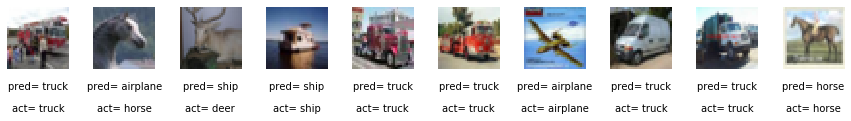

In [18]:
n_to_show = 10
indices = np.random.choice(range(len(X_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            'pred= ' + str(preds_single[idx]), 
            fontsize=10, 
            ha='center', 
            transform=ax.transAxes
           )
    ax.text(0.5, -0.7, 
            'act= ' + str(actual_single[idx]), 
            fontsize=10, 
            ha='center', 
            transform=ax.transAxes
    )
    ax.imshow(img)

In [21]:
input_layer = K_layers.Input((32, 32, 3))

conv_layer_1 = K_layers.Conv2D(
    filters = 10, 
    kernel_size = (4, 4), 
    strides = 2, 
    padding = 'same'
)(input_layer)

conv_layer_2 = K_layers.Conv2D(
    filters = 20, 
    kernel_size = (3, 3), 
    strides = 2, 
    padding = 'same'
)(conv_layer_1)

flatten_layer = K_layers.Flatten()(conv_layer_2)

output_layer = K_layers.Dense(10, activation='softmax')(flatten_layer)

model = K_models.Model(input_layer, output_layer)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________
None
